<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#telco">Get Telco Dataset</a></li>
<li><a href="#keycol">Key Columns</a></li>
<li><a href="#stats">Explore Stats</a></li>

##### Orientation:
The purpose of this file is to explore the key columns from the 'telco' dataset identified from 'explore(visuals)' and figure out whether or not the column is useful.

<a id='imports'></a>
# IMPORTS:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Basic
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from scipy import stats

# Get cleaned 'telco'
import prepare

# Functions to assist with exploration
import explore

<a id='telco'></a>
# Get Telco Dataset:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
# Acquire cleaned 'telco' dataset
telco = prepare.prep_telco()
telco.sample()

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,sign_dayofweek_1,sign_dayofweek_2,sign_dayofweek_3,sign_dayofweek_4,sign_dayofweek_5,sign_dayofweek_6,total_services,total_extra_services,value_per_total_services,value_per_total_extra_services
4295,Female,1,Yes,No,69,Yes,Yes,No,Yes,No,...,0,0,1,0,0,0,7,4,15.057143,26.35


<a id='keycol'></a>
# Key Columns:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Columns For Further Stat Exploration
- Categorical Values:
    - 'partner' = 'Yes'
    - 'dependents' = 'Yes'
    - 'online_security' = 'Yes', 'No internet service'
    - 'online_backup = 'Yes', 'No internet service'
    - 'device_protection' = 'Yes', 'No internet service'
    - 'tech_support' = 'Yes', 'No internet service'
    - 'streaming_tv' = 'No internet service'
    - 'streaming_movies' = 'No internet service'
    - 'paperless_billing = 'No'
    - 'contract_type' = 'One year', 'Two year'
    - 'internet_service_type' = 'DSL', 'None'
    - 'payment_type' = 'Mailed_check', 'Credit_card_(automatic)', 'Bank_transfer_(automatic)'
    - 'sign_year' < '2020'
    - 'sign_month' < '10'
    - 'sign_dayofweek' != '1' (Tuesday)
    - 'total_services' = '1', '2', '6', '7', '8', '9'
    - 'total_extra_services' > '3'
- Continuous Values:
    - 'senior_citizen' == '0'
    - 'tenure' > 24
    - 'monthly_charges' < 60
    - 'value_per_total_services' < 16
- KEY AVOIDANCE FACTORS:
    - 'payment_type' = 'Electronic check'
    - 'contract_type' = 'Month-to-month'
    - 'total_services'= '3', '4', '5'
    - 'total_extra_services' = '1', '2', '3'

### Additional Comment:
- Target audience:
    - Couples
    - Families/Dependents
- Services Emphasis:
    - Cell Services:
        - Not much difference with/without/multiple
    - Internet Services:
        - Either no internet or at least bundle 3 subs
- Payments:
    - DO NOT ALLOW ELECTRONIC CHECK
- Contracts:
    - DO NOT ALLOW MONTH CONTRACT

In [61]:
# List for reference
catlist = [
    'partner',
    'dependents',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'paperless_billing',
    'contract_type',
    'internet_service_type',
    'payment_type',
    'sign_year',
    'sign_month',
    'sign_dayofweek',
    'total_services',
    'total_extra_services'
]

<a id='stats'></a>
# Explore Stats:
<li><a href='#TableOfContents'>Table of Contents</a></li>

$H_0$ : For each of the identified columns, the column does not have an impact on a customer's churn.

$H_a$ : For each of the identified columns, the column has an impact on a customer's churn.

In [62]:
# Utilize chi2 loop testing due to all cols 
# being of categorical types
# Compare to CHURN
for x in catlist:
    observed = pd.crosstab(telco[x], telco.churn)
    alpha = 0.05
    p_val = stats.chi2_contingency(observed)[1]
    if alpha > p_val:
        print(f'\033[32m{x}\033[0m has an impact: {p_val}\n')
    else:
        print(f'\033[31m{x}\033[0m does not have an impact: {p_val}\n')

partner has an impact: 2.1399113440759935e-36

dependents has an impact: 4.9249216612154196e-43

online_security has an impact: 2.661149635176552e-185

online_backup has an impact: 2.0797592160864276e-131

device_protection has an impact: 5.505219496457244e-122

tech_support has an impact: 1.4430840279998987e-180

streaming_tv has an impact: 5.528994485739183e-82

streaming_movies has an impact: 2.667756755723681e-82

paperless_billing has an impact: 4.073354668665985e-58

contract_type has an impact: 5.863038300673391e-258

internet_service_type has an impact: 9.571788222840544e-160

payment_type has an impact: 3.6823546520097993e-140

sign_year has an impact: 2.9329097538306124e-188

sign_month has an impact: 4.1755074288852813e-76

sign_dayofweek has an impact: 3.891775403142802e-43

total_services has an impact: 5.003495854384364e-96

total_extra_services has an impact: 2.4739281727305314e-81



$H_0$ : For each of the identified columns, the column does not have an impact on a customer's tenure.

$H_a$ : For each of the identified columns, the column has an impact on a customer's tenure.

In [5]:
# Tenure mean
tenuremean = telco.tenure.mean()
tenuremean

32.37114865824223

In [6]:
# EXPLORE LATER
def ttestind(subset_var1, subset_var2):
    '''
    Returns a statistic and p-value as well as a visualization using the T-Test, independent methodology
    (ttest_ind is used for comparing two independent subsets and a shared value)
    stats.ttest_ind(mpg[mpg.year == 1999].cty, mpg[mpg.year == 2008].cty)
    Tests the relationship of city mileage between 1999 and 2008 vehicles
    '''
    stat, pval = stats.ttest_ind(subset_var1, subset_var2)
    print(f'\033[32mStatistic =\033[0m {stat}\n\033[32mP-value =\033[0m {pval}')
    sns.distplot(subset_var1, label='Subset 1')
    sns.distplot(subset_var2, label='Subset 2')
    plt.title(f'Relationship between {subset_var1} and {subset_var2}')
    plt.legend()
    plt.show()

Statistic = 34.43984224866432
P-value = 2.3346945130970824e-240


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


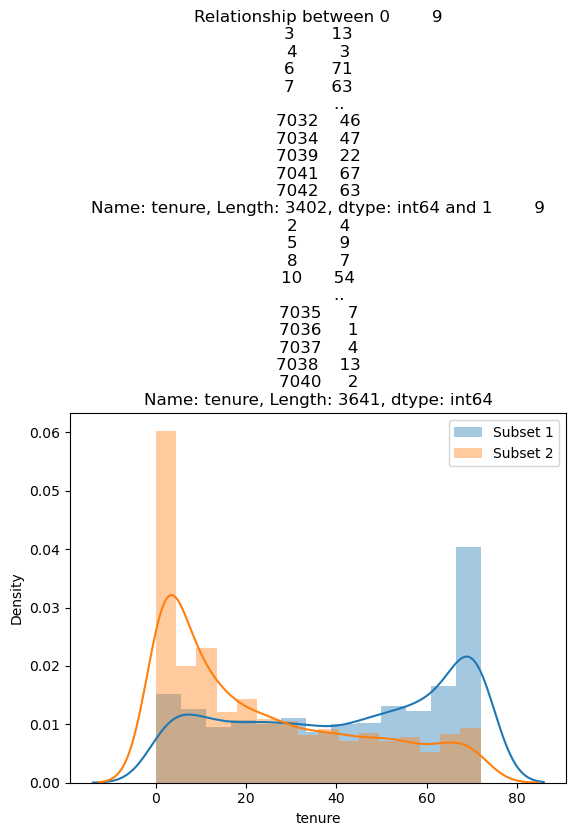

In [7]:
ttestind(telco[telco.partner == 'Yes'].tenure, telco[telco.partner == 'No'].tenure)

In [10]:
# Utilize ttest-1samp due to all columns
# being of categorical types compared to a
# continuous column TENURE
for x in vallist:
    alpha = 0.05
    p_val = stats.ttest_1samp(x, tenuremean)
    if alpha > p_val:
        print(f'\033[32m{x}\033[0m has an impact: {p_val}\n')
    else:
        print(f'\033[31m{x}\033[0m does not have an impact: {p_val}\n')

NameError: name 'vallist' is not defined

In [14]:
vallist = [
    'senior_citizen',
    'tenure',
    'monthly_charges',
    'value_per_total_services',
    'value_per_total_extra_services',
    'churn'
]

In [16]:
telco[vallist]

,senior_citizen,tenure,monthly_charges,value_per_total_services,value_per_total_extra_services,churn
0,0,9,65.60,13.120000,21.866667,No
1,0,9,59.90,14.975000,59.900000,No
2,0,4,73.90,24.633333,73.900000,Yes
3,1,13,98.00,16.333333,24.500000,Yes
4,1,3,83.90,20.975000,41.950000,Yes
...,...,...,...,...,...,...
7038,0,13,55.15,13.787500,27.575000,No
7039,0,22,85.10,21.275000,85.100000,Yes
7040,0,2,50.30,16.766667,50.300000,No
7041,0,67,67.85,11.308333,16.962500,No


In [17]:
explore.mannwhitneyu(telco[vallist])

What column do you want unique combinations of?
churn
No and Yes by senior_citizen relationship:
Stat: 4226068.0
P-value: 9.588356641599048e-37

No and Yes by tenure relationship:
Stat: 7154668.0
P-value: 2.419635517951866e-208

No and Yes by monthly_charges relationship:
Stat: 3667080.5
P-value: 3.311627651988585e-54

No and Yes by value_per_total_services relationship:
Stat: 3063819.0
P-value: 3.2239874533240773e-122

No and Yes by value_per_total_extra_services relationship:
Stat: 4216037.0
P-value: 6.923616591374592e-17



### Takeaways:
- All identified columns have a significant impact on a customer's churn rate

In [53]:
telco.value_per_total_extra_services

0

In [55]:
np.isinf(telco.value_per_total_extra_services).sum()

2219